In [149]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy.stats import norm
import math
#%load_ext lab_black

pd.set_option("max_columns", 500)

In [114]:
df1 = pd.read_csv('/volumes/roussou/Microscopy/CellAsic/LacO_I_nucleoids/Bud_size_cell_cycle_duration/series1/Images/080823_series 1_acdc_output__.csv')
df2 = pd.read_csv('/volumes/roussou/Microscopy/CellAsic/LacO_I_nucleoids/Bud_size_cell_cycle_duration/series2/Images/080823_series 2_acdc_output__.csv')
df3 = pd.read_csv('/volumes/roussou/Microscopy/CellAsic/LacO_I_nucleoids/Bud_size_cell_cycle_duration/series3/Images/080823_series 3_acdc_output__.csv')
df4 = pd.read_csv('/volumes/roussou/Microscopy/CellAsic/LacO_I_nucleoids/Bud_size_cell_cycle_duration/series4/Images/080823_series 4_acdc_output__.csv')
df5 = pd.read_csv('/volumes/roussou/Microscopy/CellAsic/LacO_I_nucleoids/Bud_size_cell_cycle_duration/series5/Images/080823_series 5_acdc_output__.csv')
df_all = pd.read_csv('/volumes/roussou/Microscopy/CellAsic/LacO_I_nucleoids/Bud_size_cell_cycle_duration/frame_number_mito_networks_connected.csv', delimiter = ';')

In [115]:
df1["position_n"] = "series_1"
df2["position_n"] = "series_2"
df3["position_n"] = "series_3"
df4["position_n"] = "series_4"
df5["position_n"] = "series_5"

In [116]:
def add_pos_cell_rel_cell_columns(df):
    df['pos_rel_cell'] = (df["position_n"].astype(str)
                         + "_"
                         + df["relative_ID"].astype(str))
    
    df['pos_cell'] = (df["position_n"].astype(str)
                      + "_"
                      + df["Cell_ID"].astype(str))
    
    return df

In [117]:
df1 = add_pos_cell_rel_cell_columns(df1)
df2 = add_pos_cell_rel_cell_columns(df2)
df3 = add_pos_cell_rel_cell_columns(df3)
df4 = add_pos_cell_rel_cell_columns(df4)
df5 = add_pos_cell_rel_cell_columns(df5)

In [119]:
df_all = df_all.iloc[:-1 , :]
df_all

,Series,mother_id,daughter_id,connected_network_first_frame,connected_network_last_frame,total_number_frames_connected
0,1,7.0,11.0,2.0,12.0,10
1,NaN,1.0,17.0,6.0,16.0,10
2,NaN,5.0,19.0,7.0,14.0,7
3,NaN,4.0,13.0,4.0,14.0,10
4,NaN,3.0,2.0,-2.0,11.0,13
5,2,14.0,11.0,1.0,12.0,11
6,NaN,12.0,17.0,3.0,11.0,8
7,NaN,13.0,9.0,-2.0,10.0,12
8,NaN,8.0,23.0,7.0,18.0,11
9,NaN,5.0,20.0,6.0,17.0,11


In [123]:
# Calculate the counts for entries 1, 2, 3, and 4 in 'number_of_nuc'
counts = df_all['total_number_frames_connected'].value_counts()

# Calculate the percentages
all_cells = len(df_all)
percentages = counts / all_cells * 100

# Display the counts and percentages
print("Counts:")
print(counts)

print("\nPercentages:")
print(percentages)
print(all_cells)

Counts:
10    9
8     7
11    5
9     5
7     2
12    2
6     2
13    1
Name: total_number_frames_connected, dtype: int64

Percentages:
10    27.272727
8     21.212121
11    15.151515
9     15.151515
7      6.060606
12     6.060606
6      6.060606
13     3.030303
Name: total_number_frames_connected, dtype: float64
33


<ipython-input-153-e9ebbf233cfb>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0f}%'.format(x) for x in plt.gca().get_yticks()])


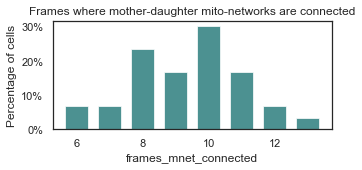

In [153]:
plt.figure(figsize=(5, 2))  # Adjust the width and height as needed

plt.bar(counts.index, percentages, width=0.7, align='center', alpha=0.7, color = '#006262')
plt.xlabel('frames_mnet_connected')
plt.ylabel('Percentage of cells')
plt.title('Frames where mother-daughter mito-networks are connected')
plt.gca().set_yticklabels(['{:.0f}%'.format(x) for x in plt.gca().get_yticks()])

max_percent_rounded = math.ceil(max(percentages))
plt.yticks(np.arange(0, max_percent_rounded + 1, step=9))  # Adjust step value as needed

plt.rcParams['svg.fonttype'] = 'none'
plt.savefig('frames_mother_daughter_networks_connected_hist_percentages.svg', transparent = True)

#plt.tight_layout()